In [1]:
import os
import sys
sys.path.append("../library")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

from dataProcess import *
from defaultPlot import *
from stringFormat import *

In [2]:
NET_DATA_DIR = os.path.join('data', 'Network')
NET_FIG_DIR = os.path.join('fig', 'Network')
network_size = 100
link_size = 1000
degree_exponent = 2.2
random_seed = 0

In [3]:
def network_name(network_size, link_size, degree_exponent, random_seed):
    name = 'N' + str(network_size) + 'L' + str(link_size) + 'G' + str(degree_exponent) + '-' + str(random_seed)
    return name

prefix = network_name(network_size, link_size, degree_exponent, random_seed)
adj_name = "Adj_" + prefix + ".csv"
degree_name = "Degree_" + prefix + ".csv"
distance_name = "Distance_" + prefix + ".csv"

# First time

In [4]:
adj = pd.read_csv((os.path.join(NET_DATA_DIR, adj_name)), header=None)
G = nx.from_pandas_adjacency(adj)


In [5]:
pos=nx.kamada_kawai_layout(G)
nx.set_node_attributes(G, pos, 'pos')

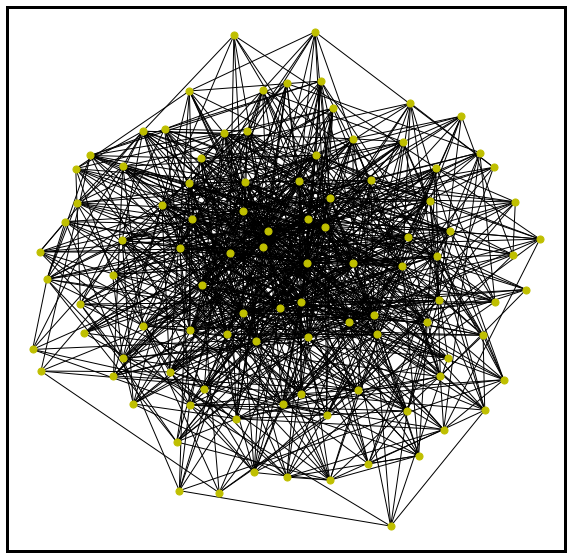

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=50, node_color='y')
fig.savefig(os.path.join(NET_FIG_DIR, prefix + ".pdf"))
fig.show()


In [15]:
nx.write_gpickle(G, os.path.join(NET_DATA_DIR, prefix + ".pkl"))

# 2+ times

In [4]:
G = nx.read_gpickle(os.path.join(NET_DATA_DIR, prefix + ".pkl"))
pos = nx.get_node_attributes(G, 'pos')


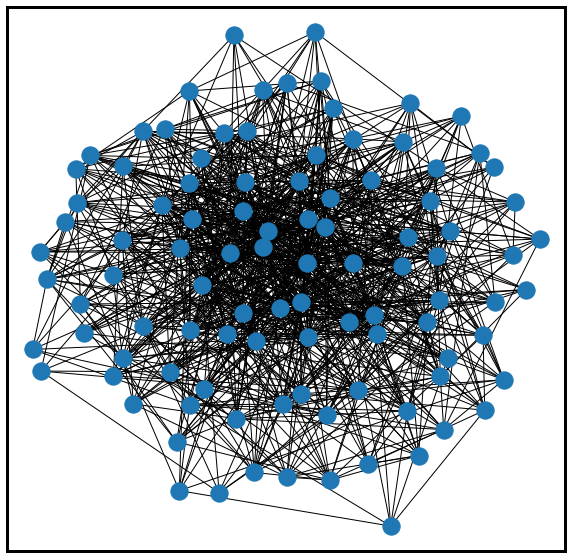

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False)
# fig.savefig(os.path.join(NET_FIG_DIR, prefix + ".pdf"))
fig.show()


In [18]:
degree_distribution = pd.read_csv(os.path.join(NET_DATA_DIR, degree_name), header=None)


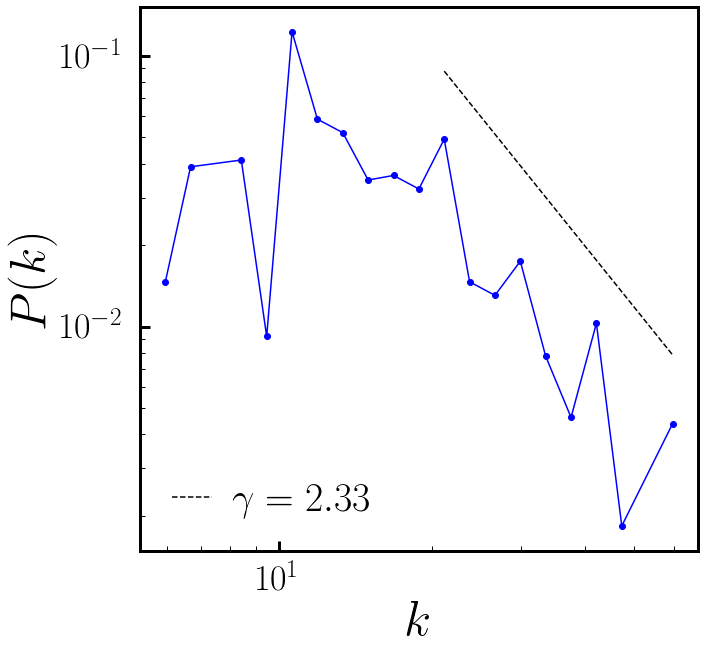

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

degree, dist = distLogBin(np.array(degree_distribution[0]),
                          np.array(degree_distribution[1]),
                          max_exponent=3,
                          delta_exponent=0.05)
ax.plot(degree, dist, 'bo-')
fitX, fitY, gamma, _ = logFit(degree[10:], dist[10:], offset=-0.5)
ax.plot(fitX, fitY, 'k--', label=latex_string("\gamma={:.2f}".format(-gamma)))

ax.legend(loc="best")
ax.set_xlabel(latex_string("k"))
ax.set_ylabel(latex_string("P(k)"))
ax.set_xscale("log")
ax.set_yscale('log')

fig.savefig(os.path.join(NET_FIG_DIR, "Degree_" + prefix + ".png"))
fig.show()